In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("Data/Drug.csv").drop("Information", axis=1)
df

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57
...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2 Reviews,5.00,5.00,5.00
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1 Reviews,5.00,5.00,5.00
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1 Reviews,5.00,4.00,5.00
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1 Reviews,5.00,5.00,5.00


In [4]:
df['Reviews'] = df['Reviews'].str.extract('(\d+)').astype(float)

In [5]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {}  # Diccionario para almacenar los encoders por columna
        for column in X.select_dtypes(include='object').columns:
            encoder = OneHotEncoder()
            encoder.fit(X[[column]])
            self.encoders[column] = encoder
        return self
    
    def transform(self, X):
        for column, encoder in self.encoders.items():
            encoded_matrix = encoder.transform(X[[column]]).toarray()
            categories = encoder.get_feature_names_out([column])
            
            for i in range(len(encoded_matrix.T)):
                X[categories[i]] = encoded_matrix.T[i]

        # Eliminar las columnas originales
        X = X.drop(list(self.encoders.keys()), axis=1)
        return X


In [ ]:
data = pd.DataFrame(FeatureEncoder().fit_transform(df))

In [7]:
corr_ = data.corr(numeric_only=True)
corr_["Effective"].sort_values(ascending=False)

Effective                                                                       1.000000
Satisfaction                                                                    0.828995
EaseOfUse                                                                       0.648417
Condition_endometriosis                                                         0.100847
Type_OTC                                                                        0.076173
                                                                                  ...   
Condition_Bacterial Conjunctivitis                                             -0.079982
Drug_Diphenhydramine Hcl, Dextromethorphan-Guaifenesin, Dextromethorphan Hbr   -0.084572
Condition_diverticulitis of gastrointestinal tract                             -0.085741
Condition_Bacterial Urinary Tract Infection                                    -0.097390
Drug_Sulfamethoxazole-Trimethoprim                                             -0.101776
Name: Effective, Leng

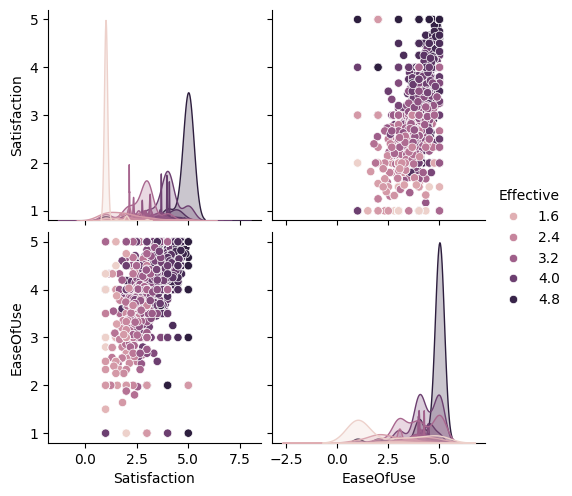

In [8]:
data["Effective"] = data["Effective"]
cat = ["Effective", "Satisfaction", "EaseOfUse"]
sns.pairplot(data[cat], hue="Effective")

In [9]:
X, y = data.drop("Effective", axis=1), data["Effective"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,Reviews,EaseOfUse,Satisfaction,Condition_Acute Bacterial Sinusitis,Condition_Atopic Dermatitis,Condition_Bacterial Conjunctivitis,Condition_Bacterial Urinary Tract Infection,Condition_Infantile Autism,Condition_Influenza,Condition_Pharyngitis due to Streptococcus Pyogenes,...,Drug_Vit E-Grape-Hyaluronate Sodium,Drug_Zanamivir,Drug_Zinc Oxide,Indication_\r\n,Indication_Off Label,Indication_On Label,Type_\r\n,Type_OTC,Type_RX,Type_RX/OTC
23,140.0,3.04,2.12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1896,1.0,5.00,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
427,8.0,3.75,2.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
552,2.0,4.00,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1175,1.0,3.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,25.0,4.31,2.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1095,1.0,4.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1130,1.0,5.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1294,1.0,5.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

lin_reg = GradientBoostingRegressor(n_iter_no_change=100, n_estimators=600, max_depth=4, learning_rate=0.05, random_state=24)
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.8961982749599674

In [12]:
y_pred = lin_reg.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

r2_score(y_test, y_pred).round(4), mean_squared_error(y_test, y_pred).round(4), mean_absolute_error(y_test, y_pred).round(4)

(0.805, 0.2213, 0.3147)

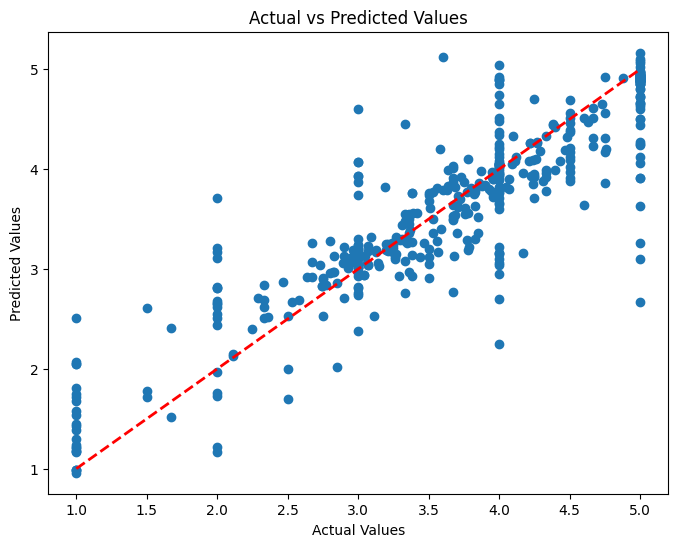

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()